## Importing Important Libraries

In [ ]:
# Daniyal Khan || 221A061

import pandas as pd
import numpy as np
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Downloading nltk packages

In [ ]:
# Daniyal Khan || 221A061

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Reading the TXT file

In [ ]:
# Daniyal Khan || 221A061

df = pd.read_csv("/content/SMSSpamCollection.txt", delimiter='\t')
df.columns =['label','message']

df.head()

,label,message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


## Data preprocessing

In [ ]:
# Daniyal Khan || 221A061

import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Daniyal Khan || 221A061

df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,message,cleaned_message
0,NaN,Ok lar... Joking wif u oni...,ok lar joking wif u oni
1,NaN,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
2,NaN,U dun say so early hor... U c already then say...,u dun say early hor u c already say
3,NaN,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
4,NaN,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling 3 weeks word back id like ...


## Function to preprocess data

In [ ]:
# Daniyal Khan || 221A061
def preprocess_text(text):
  text = text.lower()
  text = text.translate(str.maketrans('', '', string.punctuation))
  words = word_tokenize(text)
  words = [word for word in words if word not in stopwords.words('english')]
  return ' '.join(words)

df['cleaned_message'] = df['message'].apply(preprocess_text)
df.head()

,label,message,cleaned_message
0,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
2,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
3,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
4,1,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling 3 weeks word back id like ...


## Text Vectorization

In [ ]:
# Daniyal Khan || 221A061

X_train, X_test, y_train, y_test= train_test_split(df['cleaned_message'], df['label'],test_size=0.2,random_state=42)
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

## Train a Naive Bayes Model

In [ ]:
# Daniyal Khan || 221A061

model =MultinomialNB()
model.fit(X_train_vectorized, y_train)

y_pred =model.predict(X_test_vectorized)

## Now evaluating Model

In [ ]:
# Daniyal Khan || 221A061

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


## Model is 97% Accurate

## printing report

In [ ]:
# Daniyal Khan || 221A061

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       955
           1       1.00      0.79      0.89       160

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



## Displaying confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

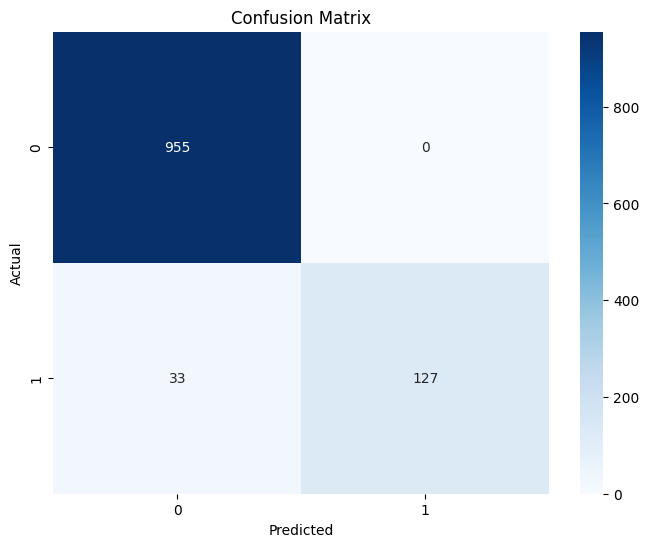

In [ ]:
# Daniyal Khan || 221A061

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

## testing the message with new messages

In [ ]:
# Daniyal Khan || 221A061

def predict_spam(text):
  text = preprocess_text(text)
  text_vectorized = vectorizer.transform([text])
  prediction = model.predict(text_vectorized)
  return "Spam" if prediction[0] == 1 else "Not Spam"

In [ ]:
# Daniyal Khan || 221A061

# Text Messages

test_messages =[
    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.T&C's apply 08452810075over18's",
    "U dun say so early hor... U c already then say...",
    "Nah I don't think he goes to usf, he lives around here though",
    "Even my brother is not like to speak with me. They treat me like cancer patent."
]


## Checking prediction

In [ ]:
# Daniyal Khan || 221A061

for message in test_messages:
  print(f"Message: '{message}' - {predict_spam(message)}")


Message: 'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.T&C's apply 08452810075over18's' - Spam
Message: 'U dun say so early hor... U c already then say...' - Not Spam
Message: 'Nah I don't think he goes to usf, he lives around here though' - Not Spam
Message: 'Even my brother is not like to speak with me. They treat me like cancer patent.' - Not Spam
